In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:


with open("vetting_playlist.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Inspect the type of data
print(type(data))


tdf = pd.json_normalize(data)
tdf.info()

tdftracks=[]
for i in tdf['tracks.items']:
    tdftracks.append(i)

<class 'dict'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   collaborative                1 non-null      bool  
 1   description                  1 non-null      object
 2   href                         1 non-null      object
 3   id                           1 non-null      object
 4   images                       1 non-null      object
 5   name                         1 non-null      object
 6   primary_color                0 non-null      object
 7   public                       1 non-null      bool  
 8   snapshot_id                  1 non-null      object
 9   type                         1 non-null      object
 10  uri                          1 non-null      object
 11  external_urls.spotify        1 non-null      object
 12  followers.href               0 non-null      object
 13  followers.total         

In [3]:
tdf.head()

,collaborative,description,href,id,images,name,primary_color,public,snapshot_id,type,...,owner.id,owner.type,owner.uri,tracks.href,tracks.items,tracks.limit,tracks.next,tracks.offset,tracks.previous,tracks.total
0,False,,https://api.spotify.com/v1/playlists/0bw8158RM...,0bw8158RM7roegphH1GYCx,"[{'height': 640, 'url': 'https://mosaic.scdn.c...",Vetting,None,True,AAABIJSLYfVS0G/X1DWMDI3nNNKm6xlu,playlist,...,1225630715,user,spotify:user:1225630715,https://api.spotify.com/v1/playlists/0bw8158RM...,"[{'added_at': '2017-06-23T23:21:59Z', 'added_b...",100,https://api.spotify.com/v1/playlists/0bw8158RM...,0,None,146


In [4]:
ttracks=pd.DataFrame(tdftracks)

In [5]:
ttracks.head()

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,"{'added_at': '2017-06-23T23:21:59Z', 'added_by...","{'added_at': '2017-04-21T17:02:44Z', 'added_by...","{'added_at': '2017-06-12T22:46:03Z', 'added_by...","{'added_at': '2017-04-15T00:53:05Z', 'added_by...","{'added_at': '2017-06-29T23:13:06Z', 'added_by...","{'added_at': '2017-04-15T00:54:34Z', 'added_by...","{'added_at': '2017-04-15T00:55:17Z', 'added_by...","{'added_at': '2017-04-15T00:58:29Z', 'added_by...","{'added_at': '2017-07-22T19:07:37Z', 'added_by...","{'added_at': '2017-09-06T02:44:13Z', 'added_by...",...,"{'added_at': '2024-03-06T16:23:29Z', 'added_by...","{'added_at': '2024-03-06T16:23:50Z', 'added_by...","{'added_at': '2024-03-25T19:55:00Z', 'added_by...","{'added_at': '2024-04-16T20:28:54Z', 'added_by...","{'added_at': '2024-07-01T20:30:46Z', 'added_by...","{'added_at': '2024-07-02T05:22:56Z', 'added_by...","{'added_at': '2024-10-06T05:22:15Z', 'added_by...","{'added_at': '2024-10-06T05:24:37Z', 'added_by...","{'added_at': '2024-11-07T23:54:43Z', 'added_by...","{'added_at': '2024-12-12T22:41:56Z', 'added_by..."


In [6]:
ttracks=ttracks.T

In [7]:
ttracks.head()

,0
0,"{'added_at': '2017-06-23T23:21:59Z', 'added_by..."
1,"{'added_at': '2017-04-21T17:02:44Z', 'added_by..."
2,"{'added_at': '2017-06-12T22:46:03Z', 'added_by..."
3,"{'added_at': '2017-04-15T00:53:05Z', 'added_by..."
4,"{'added_at': '2017-06-29T23:13:06Z', 'added_by..."


In [8]:
ttracks = ttracks[0].apply(pd.Series)
ttracks.head()

,added_at,added_by,is_local,primary_color,track,video_thumbnail
0,2017-06-23T23:21:59Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'preview_url': None, 'available_markets': [],...",{'url': None}
1,2017-04-21T17:02:44Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'preview_url': None, 'available_markets': [],...",{'url': None}
2,2017-06-12T22:46:03Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'preview_url': None, 'available_markets': ['A...",{'url': None}
3,2017-04-15T00:53:05Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'preview_url': None, 'available_markets': [],...",{'url': None}
4,2017-06-29T23:13:06Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'preview_url': None, 'available_markets': [],...",{'url': None}


In [9]:
ttracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   added_at         146 non-null    object
 1   added_by         146 non-null    object
 2   is_local         146 non-null    bool  
 3   primary_color    0 non-null      object
 4   track            146 non-null    object
 5   video_thumbnail  146 non-null    object
dtypes: bool(1), object(5)
memory usage: 6.0+ KB


In [10]:
actual_tracks = ttracks['track'].apply(pd.Series)
actual_tracks.head()

,preview_url,available_markets,explicit,type,episode,track,album,artists,disc_number,track_number,duration_ms,external_ids,external_urls,href,id,name,popularity,uri,is_local
0,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,3,215879,{'isrc': 'USFMT1406103'},{'spotify': 'https://open.spotify.com/track/0N...,https://api.spotify.com/v1/tracks/0NSEZeWHkYCk...,0NSEZeWHkYCknk1nAVO1Fh,Better Than,0,spotify:track:0NSEZeWHkYCknk1nAVO1Fh,False
1,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,4,308066,{'isrc': 'USBQU1100085'},{'spotify': 'https://open.spotify.com/track/17...,https://api.spotify.com/v1/tracks/17ZnveSDBpG9...,17ZnveSDBpG9QtL7zLJNPy,Only For You,0,spotify:track:17ZnveSDBpG9QtL7zLJNPy,False
2,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,2,181259,{'isrc': 'TCACH1515840'},{'spotify': 'https://open.spotify.com/track/1D...,https://api.spotify.com/v1/tracks/1DrlLvlYd1FI...,1DrlLvlYd1FIjNavRm6NdX,Back Pocket,61,spotify:track:1DrlLvlYd1FIjNavRm6NdX,False
3,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,3,257920,{'isrc': 'USATO1400852'},{'spotify': 'https://open.spotify.com/track/51...,https://api.spotify.com/v1/tracks/51ggEZWbFP5d...,51ggEZWbFP5dMdWjGCDYTk,Dunes,0,spotify:track:51ggEZWbFP5dMdWjGCDYTk,False
4,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,4,234973,{'isrc': 'USUG11400491'},{'spotify': 'https://open.spotify.com/track/40...,https://api.spotify.com/v1/tracks/40WXqoyOLAAu...,40WXqoyOLAAugGmJWZU1FY,All The Time,18,spotify:track:40WXqoyOLAAugGmJWZU1FY,False


In [11]:
actual_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   preview_url        0 non-null      object
 1   available_markets  146 non-null    object
 2   explicit           146 non-null    bool  
 3   type               146 non-null    object
 4   episode            146 non-null    bool  
 5   track              146 non-null    bool  
 6   album              146 non-null    object
 7   artists            146 non-null    object
 8   disc_number        146 non-null    int64 
 9   track_number       146 non-null    int64 
 10  duration_ms        146 non-null    int64 
 11  external_ids       146 non-null    object
 12  external_urls      146 non-null    object
 13  href               146 non-null    object
 14  id                 146 non-null    object
 15  name               146 non-null    object
 16  popularity         146 non-null    int64 
 1

In [12]:
songs=pd.read_csv('tracks.csv')
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [13]:
true_df= pd.merge(actual_tracks, songs, on="id", how="left")
true_df.info()
true_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   preview_url        0 non-null      object 
 1   available_markets  146 non-null    object 
 2   explicit_x         146 non-null    bool   
 3   type               146 non-null    object 
 4   episode            146 non-null    bool   
 5   track              146 non-null    bool   
 6   album              146 non-null    object 
 7   artists_x          146 non-null    object 
 8   disc_number        146 non-null    int64  
 9   track_number       146 non-null    int64  
 10  duration_ms_x      146 non-null    int64  
 11  external_ids       146 non-null    object 
 12  external_urls      146 non-null    object 
 13  href               146 non-null    object 
 14  id                 146 non-null    object 
 15  name_x             146 non-null    object 
 16  popularity_x       146 non

,preview_url,available_markets,explicit_x,type,episode,track,album,artists_x,disc_number,track_number,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,2,...,2.0,-7.738,1.0,0.153,0.478,0.00281,0.0435,0.89,89.821,4.0
3,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Features: duration, popularity, valence, tempo, acousticness, mode, energy, genre
true_df = true_df.dropna(subset=['key'])
true_df.info()
true_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 2 to 137
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   preview_url        0 non-null      object 
 1   available_markets  27 non-null     object 
 2   explicit_x         27 non-null     bool   
 3   type               27 non-null     object 
 4   episode            27 non-null     bool   
 5   track              27 non-null     bool   
 6   album              27 non-null     object 
 7   artists_x          27 non-null     object 
 8   disc_number        27 non-null     int64  
 9   track_number       27 non-null     int64  
 10  duration_ms_x      27 non-null     int64  
 11  external_ids       27 non-null     object 
 12  external_urls      27 non-null     object 
 13  href               27 non-null     object 
 14  id                 27 non-null     object 
 15  name_x             27 non-null     object 
 16  popularity_x       27 non-null  

,preview_url,available_markets,explicit_x,type,episode,track,album,artists_x,disc_number,track_number,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,2,...,2.0,-7.738,1.0,0.1530,0.47800,0.002810,0.0435,0.890,89.821,4.0
10,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,2,...,5.0,-5.597,1.0,0.0286,0.28900,0.005680,0.0800,0.704,159.871,4.0
18,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,7.0,-10.850,1.0,0.0334,0.73000,0.000003,0.2080,0.423,98.075,3.0
25,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,5,...,2.0,-4.193,1.0,0.0567,0.13200,0.000969,0.1150,0.575,166.303,4.0
29,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,2,...,7.0,-4.592,1.0,0.0741,0.00956,0.434000,0.1420,0.205,117.314,4.0


In [15]:
features = ["duration_ms_x", "popularity_x", "valence", "tempo", "acousticness", "speechiness", "energy", "explicit_x"]
X = true_df[features].copy()
for i, row in true_df.iterrows():
    med = row['explicit_x']
    if med == True:
        true_df.loc[i, 'explicitnum'] = 1
    else:
        true_df.loc[i, 'explicitnum'] = 0


In [16]:
true_df.info()
true_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 2 to 137
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   preview_url        0 non-null      object 
 1   available_markets  27 non-null     object 
 2   explicit_x         27 non-null     bool   
 3   type               27 non-null     object 
 4   episode            27 non-null     bool   
 5   track              27 non-null     bool   
 6   album              27 non-null     object 
 7   artists_x          27 non-null     object 
 8   disc_number        27 non-null     int64  
 9   track_number       27 non-null     int64  
 10  duration_ms_x      27 non-null     int64  
 11  external_ids       27 non-null     object 
 12  external_urls      27 non-null     object 
 13  href               27 non-null     object 
 14  id                 27 non-null     object 
 15  name_x             27 non-null     object 
 16  popularity_x       27 non-null  

,preview_url,available_markets,explicit_x,type,episode,track,album,artists_x,disc_number,track_number,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicitnum
2,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,2,...,-7.738,1.0,0.1530,0.47800,0.002810,0.0435,0.890,89.821,4.0,0.0
10,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,2,...,-5.597,1.0,0.0286,0.28900,0.005680,0.0800,0.704,159.871,4.0,0.0
18,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-10.850,1.0,0.0334,0.73000,0.000003,0.2080,0.423,98.075,3.0,0.0
25,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,5,...,-4.193,1.0,0.0567,0.13200,0.000969,0.1150,0.575,166.303,4.0,0.0
29,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,2,...,-4.592,1.0,0.0741,0.00956,0.434000,0.1420,0.205,117.314,4.0,0.0


In [17]:
true_df['synthness'] = (1 - true_df['acousticness']) * true_df['instrumentalness'] * true_df['energy']

In [18]:
features = ["duration_ms_x", "popularity_x", "valence", "tempo", "synthness"]
X = true_df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", edgecolors="k", alpha=0.7)
    plt.title(title)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()

C:\Users\georg\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\georg\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\georg\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\georg\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\georg\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

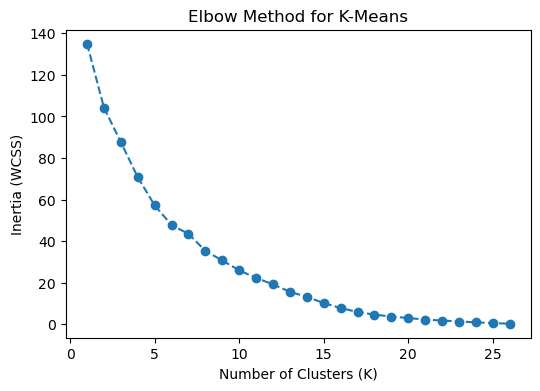

In [19]:
k_values = range(1, 27)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for K-Means")
plt.show()

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


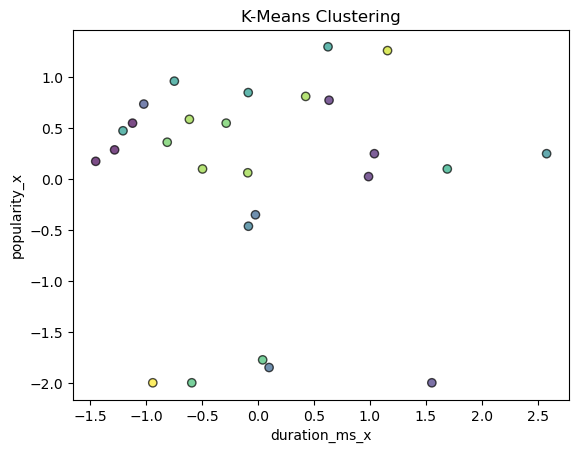

In [20]:
kmeans = KMeans(n_clusters=14, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

plot_clusters(X_scaled, kmeans_labels, "K-Means Clustering")

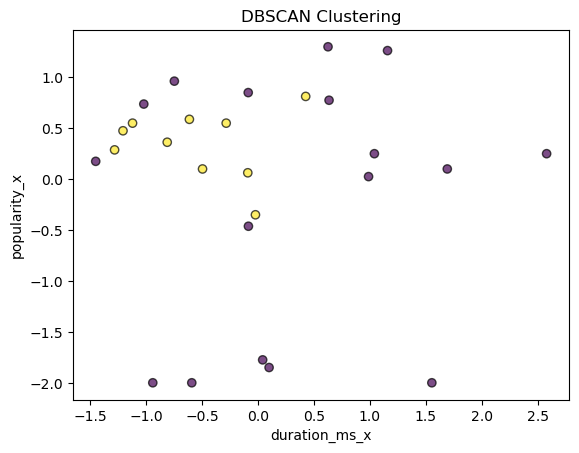

In [21]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plot_clusters(X_scaled, dbscan_labels, "DBSCAN Clustering")

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

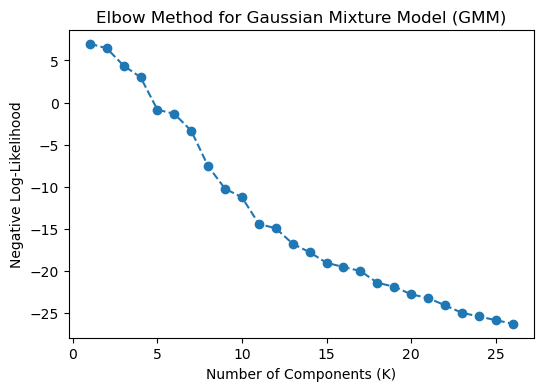

In [22]:
gmm_values = []
k_values = range(1, 27)
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    gmm_values.append(-gmm.score(X_scaled))  # Use negative log-likelihood

# Plot Elbow Curve for GMM
plt.figure(figsize=(6, 4))
plt.plot(k_values, gmm_values, marker='o', linestyle='--')
plt.xlabel("Number of Components (K)")
plt.ylabel("Negative Log-Likelihood")
plt.title("Elbow Method for Gaussian Mixture Model (GMM)")
plt.show()

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


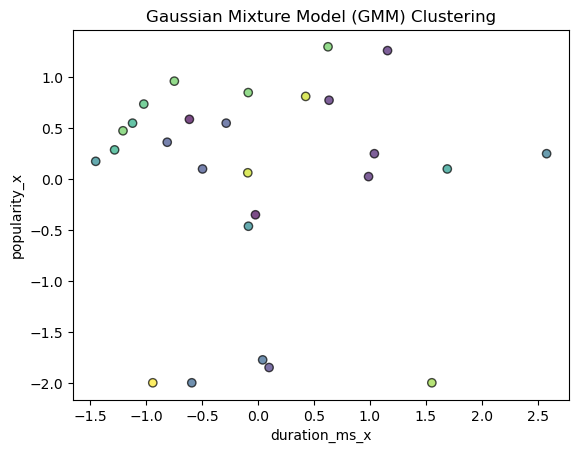

In [23]:
gmm = GaussianMixture(n_components=14, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

plot_clusters(X_scaled, gmm_labels, "Gaussian Mixture Model (GMM) Clustering")

In [24]:
file_paths = [
    'mpd.slice.0-999.json',
    'mpd.slice.99000-99999.json',
    'mpd.slice.995000-995999.json',
    'mpd.slice.996000-996999.json',
    'mpd.slice.997000-997999.json',
    'mpd.slice.998000-998999.json',
    'mpd.slice.999000-999999.json'
]

all_data = []

for file_path in file_paths:
    with open(file_path, 'r') as file:
        data = json.load(file)
        for playlist in data['playlists']:
            playlist_name = playlist['name']
            playlist_desc = playlist.get('description', '') 
            for track in playlist['tracks']:
                track_id = track['track_uri'].replace("spotify:track:", "")
                all_data.append({
                    'playlist_name': playlist_name,
                    'playlist_desc': playlist_desc,
                    'position_in_playlist': track['pos'],
                    'track_name': track['track_name'],
                    'id': track_id,  
                    'artist_name': track['artist_name'],
                    'duration_ms': track['duration_ms'],
                    'album_name': track['album_name']
                })

xdf = pd.DataFrame(all_data)

print(xdf.head())
xdf.dropna
dmz = pd.merge(xdf, songs, on = 'id', how = 'inner')
dmz.dropna()
dmz.info()
dmz.dropna(how = 'all')
dmz['synthness'] = (1 - dmz['acousticness']) * dmz['instrumentalness'] * dmz['energy']
features =['duration_ms_x', 'popularity', 'valence', 'tempo', 'synthness']
Xa= dmz[features].copy()
Xa_scaled=scaler.fit_transform(Xa)
def plot_clusters(Xa, labels, title):
    plt.scatter(Xa[:, 0,Xa], Xa[:, 1], c=labels, cmap='virdis', edgecolors='K', alpha=0.7)
    plt.title(title)
    plt.xLabel(features[0])
    plt.yLabel(features[1])
    plt.show()



  playlist_name playlist_desc  position_in_playlist  \
0    Throwbacks                                   0   
1    Throwbacks                                   1   
2    Throwbacks                                   2   
3    Throwbacks                                   3   
4    Throwbacks                                   4   

                                   track_name                      id  \
0  Lose Control (feat. Ciara & Fat Man Scoop)  0UaMYEvWZi0ZqiDOoHU3YI   
1                                       Toxic  6I9VzXrHxO9rA9A5euc8Ak   
2                               Crazy In Love  0WqIKmW4BTrj3eJFmnCKMv   
3                              Rock Your Body  1AWQoqb9bSvzTjaLralEkT   
4                                It Wasn't Me  1lzr43nnXAijIGYnCT8M8H   

         artist_name  duration_ms  \
0      Missy Elliott       226863   
1     Britney Spears       198800   
2            Beyoncé       235933   
3  Justin Timberlake       267266   
4             Shaggy       227600   

       

In [ ]:
Xa_scaled=scaler.fit_transform(Xa)
k_values = range(2, 3)
inertia_values = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(Xa_scaled)
   
    inertia_values.append(kmeans.inertia_)
    if k + 1 > 1:
        silhouette = silhouette_score(Xa_scaled, labels)
        silhouette_scores.append(silhouette)
        print(f"Clusters: {k}, Silhouette Score: {silhouette:.4f}")
    else:
        silhouette_scores.append(-1)  # Not valid for 1 cluster
        print(f"Clusters: {k}, Silhouette Score: Not applicable")
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Cluster (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for K-Means')
plt.show()
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_silhouette = max(silhouette_scores)
print(f"\nOptimal Number of Clusters: {optimal_k}")
print(f"Highest Silhouette Score: {optimal_silhouette:.4f} (Best Model)")